In [ ]:
!pip install keras-nightly

In [ ]:
from tensorflow.keras.applications import EfficientNetV2L, VGG16, ResNet50V2

model = VGG16(weights='imagenet',
                        include_top=False,
                        input_shape=(224, 224, 3))

model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

my_model = Sequential([model,
                       GlobalAveragePooling2D(),
                       Dense(512, activation='relu'),
                       Dropout(0.2),
                       Dense(512, activation='relu'),
                       Dropout(0.2),
                       Dense(1, activation='sigmoid')])

my_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,240,513 (58.14 MB)

 Trainable params: 525,825 (2.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
!ls drive/MyDrive/dados_estacionamento/

BagOfFeatures.ipynb  imagens	      model.keras	  model_vgg.keras     train_labels.pkl
CNRPark+EXT.csv      images.rar       modelo.ipynb	  model_vgg_v2.keras  videos
descriptor_list.pkl  im_features.pkl  model_resnet.keras  move_imagens.ipynb
descriptors.pkl      kmeans.pkl       model_vgg19.keras   pipeline.pkl


In [ ]:
import tensorflow as tf

BATCH_SIZE = 32
SEED = 1

train_dataset = tf.keras.utils.image_dataset_from_directory(
    'drive/MyDrive/dados_estacionamento/imagens/',
    color_mode='rgb',
    label_mode='binary',
    batch_size=BATCH_SIZE,
    image_size=(224, 224),
    shuffle=True,
    validation_split=0.2,
    subset='training',
    seed=SEED)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    'drive/MyDrive/dados_estacionamento/imagens/',
    color_mode='rgb',
    label_mode='binary',
    batch_size=BATCH_SIZE,
    image_size=(224, 224),
    shuffle=False,
    validation_split=0.2,
    subset='validation',
    seed=SEED
)

Found 12623 files belonging to 2 classes.
Using 10099 files for training.
Found 12623 files belonging to 2 classes.
Using 2524 files for validation.


In [ ]:
# iterator = iter(train_dataset)

In [ ]:
# next(iterator)[0][0].numpy().shape

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plt.imshow(next(iterator)[0][0].numpy().astype(np.int32))

In [ ]:
from tensorflow.image import flip_left_right, adjust_brightness, adjust_contrast

def augment(image, label):
  image = flip_left_right(image)
  image = adjust_brightness(image, delta=0.1)
  image = adjust_contrast(image, contrast_factor=1.75)

  return (image, label)

train_dataset = train_dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

# iterator = iter(train_dataset)

In [ ]:
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [ ]:
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [ ]:
from tensorflow.keras.metrics import *

metrics = ['accuracy', Precision(), Recall(), AUC()]

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

my_model.compile(loss=BinaryCrossentropy(),
                 optimizer=Adam(learning_rate=0.001),
                 metrics=metrics)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=2, monitor='val_loss')

In [ ]:
with tf.device('/device:GPU:0'):
  history = my_model.fit(train_dataset, epochs=10,
             validation_data=val_dataset,
             callbacks=[es])

Epoch 1/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 162s 496ms/step - accuracy: 0.9421 - auc_2: 0.9788 - loss: 0.1963 - precision_2: 0.9507 - recall_2: 0.9630 - val_accuracy: 0.9786 - val_auc_2: 0.0000e+00 - val_loss: 0.0818 - val_precision_2: 1.0000 - val_recall_2: 0.9786
Epoch 2/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 70s 223ms/step - accuracy: 0.9831 - auc_2: 0.9974 - loss: 0.0446 - precision_2: 0.9839 - recall_2: 0.9907 - val_accuracy: 0.9996 - val_auc_2: 0.0000e+00 - val_loss: 0.0105 - val_precision_2: 1.0000 - val_recall_2: 0.9996
Epoch 3/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 71s 188ms/step - accuracy: 0.9884 - auc_2: 0.9988 - loss: 0.0302 - precision_2: 0.9896 - recall_2: 0.9930 - val_accuracy: 0.9988 - val_auc_2: 0.0000e+00 - val_loss: 0.0201 - val_precision_2: 1.0000 - val_recall_2: 0.9988
Epoch 4/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 70s 221ms/step - accuracy: 0.9932 - auc_2: 0.9989 - loss: 0.0215 - precision_2: 0.9939 - recall_2: 0.9959 - val_accuracy: 0.9988 - val_auc_2: 0.0000e+00 - val_loss: 0.0207 - va

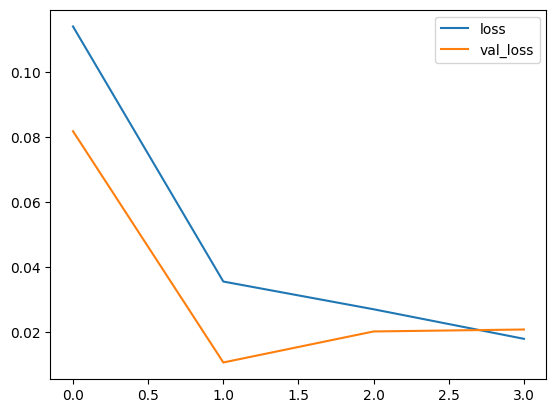

In [ ]:
# Plot History

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
# To save your trained model:

# my_model.save('drive/MyDrive/dados_estacionamento/model_vgg_v2.keras')

In [ ]:
# To downlaod your saved model, zip with code below then download

# !zip -r model.zip model

In [ ]:
# To unzip a zipped model folder:

# !unzip model.zip

In [ ]:
# To load a model back in memory from an unzipped model folder:

my_model = tf.keras.models.load_model('drive/MyDrive/dados_estacionamento/model_vgg.keras')

my_model

<Sequential name=sequential, built=True>

In [ ]:
my_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,292,165 (62.15 MB)

 Trainable params: 525,825 (2.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,051,652 (4.01 MB)

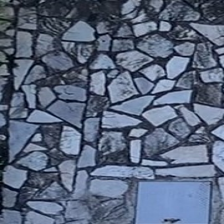

In [ ]:
from PIL import Image

image = Image.open('./vazioo (1).jpg')
image = image.resize((224, 224))
image

In [ ]:
img = np.asarray(image)[:, :, :3]

img.shape

(224, 224, 3)

In [ ]:
import os
from PIL import Image

def convert_png_to_jpg(folder_path):
  for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
      img_path = os.path.join(folder_path, filename)
      img = Image.open(img_path)
      jpg_filename = os.path.splitext(filename)[0] + ".jpg"
      jpg_path = os.path.join(folder_path, jpg_filename)
      img = img.convert('RGB')
      img.save(jpg_path, "JPEG")
      print(f"Converted {filename} to {jpg_filename}")

convert_png_to_jpg(".")

In [ ]:
img_2 = np.asarray(image)[..., :3]

img_2.shape

(224, 224, 3)

In [ ]:
import os
import numpy as np
from PIL import Image

image_list = []
folder_path = './' 

names = list()
for filename in os.listdir(folder_path):
  if filename.endswith('.jpg'):
    image_path = os.path.join(folder_path, filename)
    try:
      print(filename)
      names.append(filename)
      image = Image.open(image_path)
      image = image.resize((224, 224))
      img_array = np.asarray(image)[..., :3]  # Keep only RGB channels
      image_list.append(img_array)
    except Exception as e:
      print(f"Error processing {filename}: {e}")

print(f"Loaded {len(image_list)} images.")


vazioo (12).jpg
vazioo (4).jpg
ocupado (6).jpg
vazioo (3).jpg
ocupado (12).jpg
vazioo (16).jpg
vazioo (6).jpg
vazioo (15).jpg
vazioo (13).jpg
vazioo (19).jpg
vazioo (11).jpg
vazioo (8).jpg
ocupado (4).jpg
vazioo (9).jpg
ocupado (3).jpg
vazioo (10).jpg
vazioo (14).jpg
ocupado (5).jpg
ocupado (7).jpg
ocupado (13).jpg
ocupado (11).jpg
vazioo (5).jpg
vazioo (2).jpg
ocupado (10).jpg
ocupado (2).jpg
vazioo (18).jpg
ocupado (1).jpg
vazioo (17).jpg
ocupado (9).jpg
vazioo (1).jpg
ocupado (14).jpg
vazioo (7).jpg
ocupado (8).jpg
Loaded 33 images.


array([[[ 87, 100, 119],
        [ 70,  83, 100],
        [ 61,  73,  88],
        ...,
        [134, 133, 122],
        [155, 150, 131],
        [166, 160, 137]],

       [[ 88, 101, 119],
        [ 71,  84, 101],
        [ 61,  73,  88],
        ...,
        [114, 113, 102],
        [142, 137, 118],
        [155, 149, 124]],

       [[ 84,  97, 116],
        [ 80,  93, 110],
        [ 73,  85, 100],
        ...,
        [103, 102,  91],
        [153, 148, 127],
        [151, 145, 119]],

       ...,

       [[ 40,  59,  89],
        [ 49,  68,  98],
        [120, 139, 169],
        ...,
        [121, 129, 153],
        [123, 130, 151],
        [133, 140, 159]],

       [[ 49,  68,  98],
        [ 53,  72, 102],
        [ 75,  94, 124],
        ...,
        [120, 128, 150],
        [120, 127, 146],
        [122, 129, 145]],

       [[ 75,  94, 124],
        [ 78,  97, 127],
        [ 60,  79, 109],
        ...,
        [122, 130, 150],
        [116, 123, 141],
        [102, 109, 125]]], dtype=uint8)
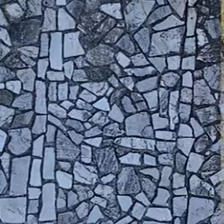

In [ ]:
image_list[0]

In [ ]:
prediction = my_model.predict(np.array(image_list))

# print(prediction)
list(zip(names, ['Vazia' if p < 0.5 else 'Ocupada' for p in prediction], list(prediction)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 453ms/step


[('vazioo (12).jpg', 'Vazia', array([1.7864124e-08], dtype=float32)),
 ('vazioo (4).jpg', 'Vazia', array([1.5261312e-10], dtype=float32)),
 ('ocupado (6).jpg', 'Ocupada', array([0.999938], dtype=float32)),
 ('vazioo (3).jpg', 'Vazia', array([3.4347317e-10], dtype=float32)),
 ('ocupado (12).jpg', 'Ocupada', array([0.9999945], dtype=float32)),
 ('vazioo (16).jpg', 'Vazia', array([9.3320525e-09], dtype=float32)),
 ('vazioo (6).jpg', 'Vazia', array([4.160538e-14], dtype=float32)),
 ('vazioo (15).jpg', 'Vazia', array([1.9028958e-12], dtype=float32)),
 ('vazioo (13).jpg', 'Vazia', array([6.7945266e-10], dtype=float32)),
 ('vazioo (19).jpg', 'Vazia', array([3.495685e-08], dtype=float32)),
 ('vazioo (11).jpg', 'Vazia', array([8.5304785e-09], dtype=float32)),
 ('vazioo (8).jpg', 'Vazia', array([1.0507549e-08], dtype=float32)),
 ('ocupado (4).jpg', 'Ocupada', array([1.], dtype=float32)),
 ('vazioo (9).jpg', 'Vazia', array([2.2298061e-06], dtype=float32)),
 ('ocupado (3).jpg', 'Ocupada', array([1

In [ ]:
my_model.predict(np.array(image_list)[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[1.7864465e-08]], dtype=float32)

In [ ]:
import cv2

for i in range(14):
  img = cv2.imread(f'./ocupado ({i+1}).jpg')
  img = cv2.resize(img, (224, 224))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  print(my_model.predict(np.array([img]))[0] < 0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[False]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[False]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[False]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[False]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[False]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[False]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[False]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[False]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[False]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[False]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[False]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[False]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[False]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[False]
